# Universality: H, T and CNOT decomposition

We already know that universality can be achieved with the U3 gate and the CNOT gate. However, the U3 gate is parameterized so it is really a set of infinite possibilities. This is a problem since in certain situations, for example when delving into the theory behind QEC, we will see that we need to define a **finite** universal set of gates. Fortunately, it has been proven that it is sufficient to have the H, T and CNOT gates to be able to generate any other type of gate.

There are indeed algorithms that allow us to approximate operators from these gates, but it is also important to learn tricks and circuit equivalences that allow us to simplify the process. This will be the objective of this challenge, we will be asked you to construct an operator U that satisfies the following equality:

<img src=" 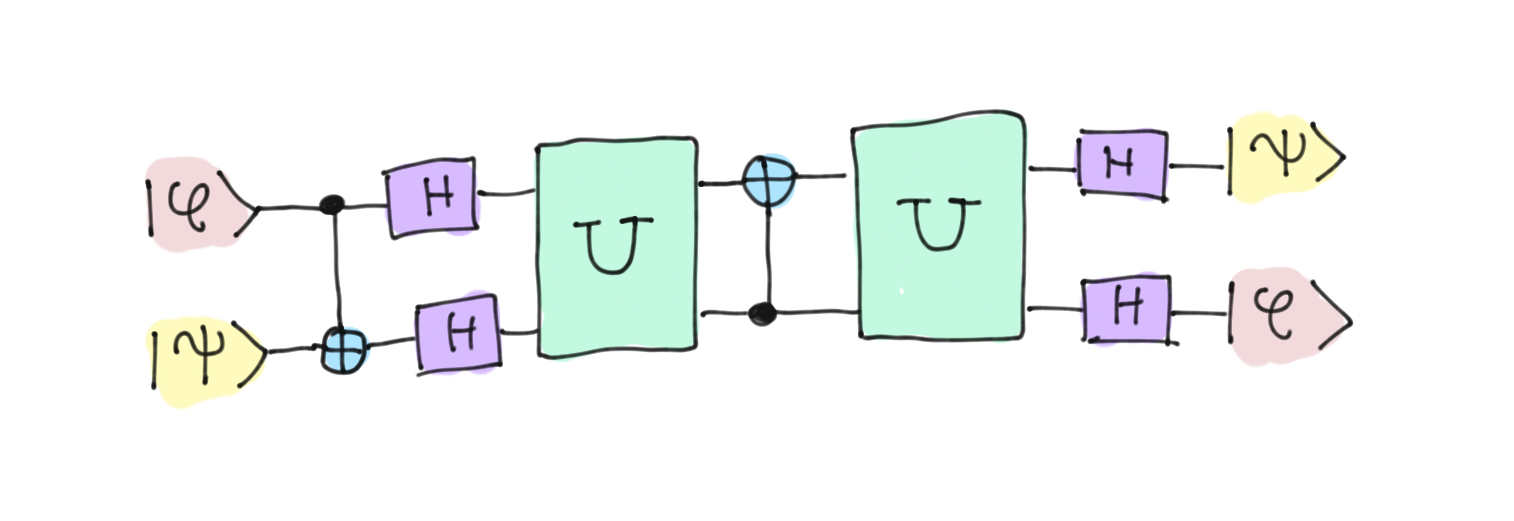">


i.e., given an arbitrary state, $\ket{\phi}\ket{\psi}$, transform it into
$\ket{\psi}\ket{\phi}$. (What would be equivalent to a SWAP gate).

To do so, you will only be able to use the H, T and CNOT gates. The solution is obtained exactly, no approximations of any kind are needed.

Note: it is not allowed to use `qml.adjoint(T)`, you can only use H, T and CNOT.

## Challenge code

You simply have to define within the quantum function U the gates that form it. Remember that you are only allowed to use H, T and CNOT. You do not have to add anything else to the code.

## Inputs and Outputs

In this challenge we will not have inputs and outputs. The test will be done by checking that the matrix of your circuit coincides with that of the statement. To prototype your code, you can always print the matrix using `qml.matrix(U)`. It should be equal to the matrix associated to the [SWAP gate](https://docs.pennylane.ai/en/stable/code/api/pennylane.SWAP.html).

If your solution matches the correct one within the given tolerance specified in check (in this case it's a `1e-05` relative error tolerance), the output will be `"Correct!"`. Otherwise, you will receive a `"Wrong answer"` prompt.

Good luck!

import functools
import json
import math
import pandas as pd
import pennylane as qml
import pennylane.numpy as np
import scipy

In [1]:
import json
import pennylane as qml
import pennylane.numpy as np

In [2]:
def U():
    """
    This quantum function will simply contain H, T and CNOT gates.
    It will not return any value.
    """

    qml.T(wires=[0])
    qml.T(wires=[0])
    qml.Hadamard(wires=[1])
    qml.CNOT(wires=[0, 1])
    qml.T(wires=[1])
    qml.T(wires=[1])
    qml.T(wires=[1])
    qml.CNOT(wires=[0, 1])
    qml.Hadamard(wires=[0])
    qml.CNOT(wires=[0, 1])

In [3]:
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def circuit():
    """
    Main circuit given in the statement, here the operators you have defined in U will be embedded.
    """

    qml.CNOT(wires=[0, 1])

    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)

    U()

    qml.CNOT(wires=[1, 0])

    U()

    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)

    return qml.state()


In [4]:
# These functions are responsible for testing the solution.

def run(input: str) -> str:
    matrix = qml.matrix(circuit)().real

    with qml.tape.QuantumTape() as tape:
        U()

    names = [op.name for op in tape.operations]
    return json.dumps({"matrix": matrix.tolist(), "gates": names})

def check(user_output: str, expected_output: str) -> str:

    parsed_output = json.loads(user_output)
    matrix_user = np.array(parsed_output["matrix"])
    gates = parsed_output["gates"]

    assert np.allclose(matrix_user, qml.matrix(qml.SWAP)(wires=[0, 1]))
    assert (
        len(set(gates)) == 3
        and "Hadamard" in gates
        and "CNOT" in gates
        and "T" in gates
    )


In [5]:
test_cases = [['No input', 'No output']]

In [6]:
for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input 'No input'...
Correct!
